# **Import Dataset**

In [109]:
# load dataset
from functions import *
from tvdatafeed_lib.main import Interval


# Processa os dados para o intervalo requerido
df = data_inter(Interval.in_weekly, 5000, 'PETR3')
df.to_csv('historical_data.csv')

#df = pd.read_csv('historical_data.csv', index_col=0)
#data.columns

print(df.head())
print('\n')
print(df.shape)

                               symbol      Open      High       Low     Close      Volume
datetime                                                                                 
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0


(1236, 6)


In [110]:
df.head()

,symbol,Open,High,Low,Close,Volume
datetime,,,,,,
2000-01-03 10:00:00,BMFBOVESPA:PETR3,0.987125,0.987125,0.890288,0.927774,39090393.0
2000-01-10 10:00:00,BMFBOVESPA:PETR3,0.937147,0.974630,0.859051,0.896538,21462612.0
2000-01-17 10:00:00,BMFBOVESPA:PETR3,0.899661,0.918402,0.827810,0.827810,20230366.0
2000-01-24 10:00:00,BMFBOVESPA:PETR3,0.830937,0.859051,0.818442,0.824688,21653821.0
2000-01-31 10:00:00,BMFBOVESPA:PETR3,0.824688,0.962134,0.809069,0.962134,23405067.0


In [111]:
# Inspect the index 
df.index

# Inspect the columns
df.columns

# Select only the last 10 observations of `Close`
ts = df['Close'][-10:]

# Check the type of `ts` 
type(ts)


pandas.core.series.Series

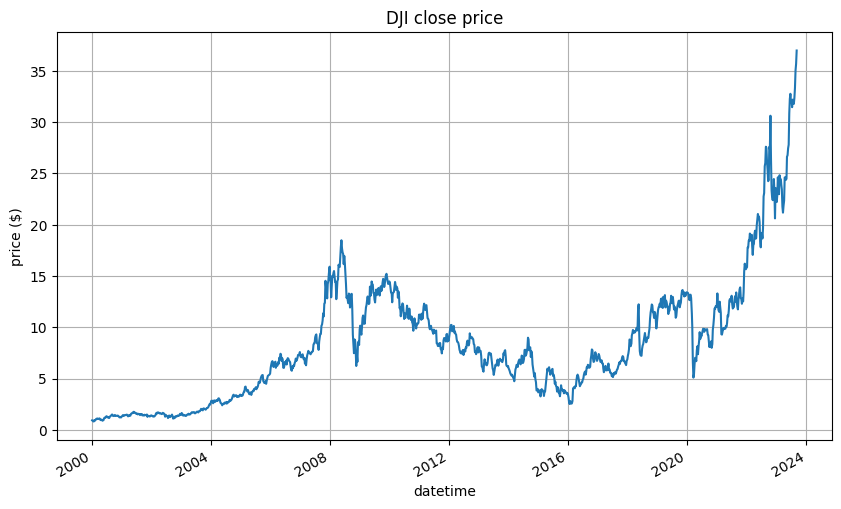

In [112]:
# Plot the closing prices for `aapl`
import matplotlib.pyplot as plt
df['Close'].plot(grid=True, figsize=(10, 6))
plt.title('DJI close price')
plt.ylabel('price ($)')
# Show the plot
plt.show()

In [113]:
import copy
DATA = df
ti= copy.deepcopy(DATA)

####**Simple Moving Average (SMA)**
SMA is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods. The SMA is basically the average price of the given time period, with equal weighting given to the price of each period.

Formula: SMA = ( Sum ( Price, n ) ) / n    
Where: n = Time Period

In [114]:
ti['SMA_10'] = (sum(ti.Close, 10))/10
ti['SMA_20'] = (sum(ti.Close, 20))/20
ti['SMA_50'] = (sum(ti.Close, 50))/50
ti['SMA_100'] = (sum(ti.Close, 100))/100
ti['SMA_200'] = (sum(ti.Close, 200))/200

In [115]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [116]:
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200
datetime                                                                                                                                           
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  1035.752006  518.3760

### **Exponential movine average (EMA)**
The three basic steps to calculating the EMA are:
- Calculate the SMA.
- Calculate the multiplier for smoothing/weighting factor for the previous EMA.
- Calculate the current EMA.

The multiplier for smoothing (weighting) the EMA typically follows the formula:  
- [2 ÷ (selected time period + 1)] 

So, for a 20-day moving average, the multiplier would be [2/(20+1)]= 0.0952.

To calculate the EMA, the following formula is used: 

- [Closing price-EMA (previous day)] x multiplier + EMA (previous day)

In [117]:
ti['ema_10'] = ti.Close.ewm(span=10).mean().fillna(0)
ti['ema_20'] = ti.Close.ewm(span=20).mean().fillna(0)
ti['ema_50'] = ti.Close.ewm(span=50).mean().fillna(0)
ti['ema_100'] = ti.Close.ewm(span=100).mean().fillna(0)
ti['ema_200'] = ti.Close.ewm(span=200).mean().fillna(0)


In [118]:
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

### **Average true range (ATR)** 

ATR measures market volatility. It is typically derived from the 14-day moving average of a series of true range indicators.

### True Range 

Highest of:
 - today's h - l
 - abs(h - y'day close)
 - abs(l - y'day close)

 ATR exp moving average is typocally 14 of that true range

In [119]:
ti['ATR'] = talib.ATR(ti['High'].values, 
                      ti['Low'].values, 
                      ti['Close'].values, 
                      timeperiod=14)

In [120]:
print(ti.tail())

                               symbol       Open       High        Low      Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  \
datetime                                                                                                                                         
2023-08-07 10:00:00  BMFBOVESPA:PETR3  31.784886  32.896582  31.436876  32.355236  58137960.0  1035.752006  518.376003  207.950401  104.475201   
2023-08-14 10:00:00  BMFBOVESPA:PETR3  32.287568  34.143618  32.171562  33.341264  68822421.0  1035.752006  518.376003  207.950401  104.475201   
2023-08-21 10:00:00  BMFBOVESPA:PETR3  33.447596  35.840000  32.722576  35.040001  66054842.0  1035.752006  518.376003  207.950401  104.475201   
2023-08-28 10:00:00  BMFBOVESPA:PETR3  35.020000  35.810001  34.139999  35.689999  70643100.0  1035.752006  518.376003  207.950401  104.475201   
2023-09-04 10:00:00  BMFBOVESPA:PETR3  35.660000  37.460000  35.000000  36.990000  39668400.0  1035.752006  518.376003  207.

###**Average Directional Index (ADX)**
ADX indicates the strength of a trend in price time series. It is a combination of the negative and positive directional movements indicators computed over a period of n past days corresponding to the input window length (typically 14 days) 


In [121]:
ti['ADX'] = talib.ADX(ti.High, ti.Low, ti.Close, timeperiod=14)

In [122]:
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

### **Commodity Channel Index (CCI)** 
CCI is an oscillator used to deter- mine whether a stock is overbought or oversold. It assesses the relationship between an asset price, its moving average and de- viations from that average:  

- CCI = (typical price − ma) / (0.015 * mean deviation)
- typical price = (high + low + close) / 3
- p = number of periods (20 commonly used)
- ma = moving average
- moving average = typical price / p
- mean deviation = (typical price - MA) / p

In [123]:
#Calculation of Commodity Channel Index
tp = (ti['High'] + ti['Low'] + ti['Close']) / 3
ma = tp / 20
md = (tp - ma) / 20
ti['CCI'] = (tp-ma)/(0.015 * md)

In [124]:
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

### **Price rate-of-change (ROC)** 
ROC measures the percentage change in price between the current price and the price a certain number of periods ago. 

ROC = [(Close price today - Close price “n” day’s ago) / Close price “n” day’s ago))]



In [125]:
ti['ROC'] = ((ti['Close'] - ti['Close'].shift(12)) / 
                    (ti['Close'].shift(12)))*100
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

### **Relative Strength Index (RSI)** 
RSI compares the size of recent gains to recent losses, it is intended to reveal the strength or weak- ness of a price trend from a range of closing prices over a time period.  


In [126]:
ti['rsi'] = talib.RSI(ti.Close.values, timeperiod = 14)
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

### **William’s %R** 
This shows the relationship between the current closing price and the high and low prices over the latest n days equal to the input window length


In [127]:
ti['Williams %R'] = talib.WILLR(ti.High.values, 
                                     ti.Low.values, 
                                     ti.Close.values, 14)
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

### **Stochastic %K** 
It compares a close price and its price interval during a period of n past days and gives a signal meaning that a stock is oversold or over- bought: 



In [128]:
ti['SO%K'] = ((ti['Close'] - 
               ti['Low']) / 
              (ti['High'] - ti['Low']))
print(ti.head())

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
datetime                                                                                                                                              
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

In [129]:
ti.index.name = 'date' # setting the index column as 'date'
print(ti.head())
print('\n')
print(ti.columns)
print('\n')
print(ti.index)

                               symbol      Open      High       Low     Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200  \
date                                                                                                                                                  
2000-01-03 10:00:00  BMFBOVESPA:PETR3  0.987125  0.987125  0.890288  0.927774  39090393.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-10 10:00:00  BMFBOVESPA:PETR3  0.937147  0.974630  0.859051  0.896538  21462612.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-17 10:00:00  BMFBOVESPA:PETR3  0.899661  0.918402  0.827810  0.827810  20230366.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-24 10:00:00  BMFBOVESPA:PETR3  0.830937  0.859051  0.818442  0.824688  21653821.0  1035.752006  518.376003  207.950401  104.475201  52.7376   
2000-01-31 10:00:00  BMFBOVESPA:PETR3  0.824688  0.962134  0.809069  0.962134  23405067.0  103

In [130]:
print(ti.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2000-01-03 10:00:00 to 2023-09-04 10:00:00
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1236 non-null   object 
 1   Open         1236 non-null   float64
 2   High         1236 non-null   float64
 3   Low          1236 non-null   float64
 4   Close        1236 non-null   float64
 5   Volume       1236 non-null   float64
 6   SMA_10       1236 non-null   float64
 7   SMA_20       1236 non-null   float64
 8   SMA_50       1236 non-null   float64
 9   SMA_100      1236 non-null   float64
 10  SMA_200      1236 non-null   float64
 11  ema_10       1236 non-null   float64
 12  ema_20       1236 non-null   float64
 13  ema_50       1236 non-null   float64
 14  ema_100      1236 non-null   float64
 15  ema_200      1236 non-null   float64
 16  ATR          1222 non-null   float64
 17  ADX          1209 non-null   float64
 18  CCI         

### Data Quality Checks:

Checked the statistics of individual columns in the dataframe.

As you can see below there are no outliers in any of the columns, however, some of the columns have NaN values

In [131]:
# Check the statistics of the columns of the merged dataframe and check for outliers
print(ti.describe())

              Open         High          Low        Close        Volume        SMA_10        SMA_20       SMA_50      SMA_100    SMA_200  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1.236000e+03  1.236000e+03  1.236000e+03  1236.000000  1236.000000  1236.0000   
mean      8.345719     8.691582     8.031713     8.371780  1.004523e+08  1.035752e+03  5.183760e+02   207.950401   104.475201    52.7376   
std       5.983694     6.240220     5.797519     6.039620  8.845311e+07  2.274657e-13  1.137329e-13     0.000000     0.000000     0.0000   
min       0.824688     0.859051     0.809069     0.824688  7.775602e+06  1.035752e+03  5.183760e+02   207.950401   104.475201    52.7376   
25%       3.822846     4.035917     3.674552     3.832128  4.368105e+07  1.035752e+03  5.183760e+02   207.950401   104.475201    52.7376   
50%       7.304416     7.593146     6.995115     7.320086  7.068673e+07  1.035752e+03  5.183760e+02   207.950401   104.475201    52.7376   
75%      11.636620  

In [132]:
ti = ti.dropna()
ti = ti.drop('symbol', axis=1)
print(ti.head())

                         Open      High       Low     Close       Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200    ema_10  \
date                                                                                                                                           
2000-07-10 10:00:00  1.296385  1.333870  1.183927  1.227661   40868625.0  1035.752006  518.376003  207.950401  104.475201  52.7376  1.180145   
2000-07-17 10:00:00  1.274518  1.283889  1.174556  1.258899   69114475.0  1035.752006  518.376003  207.950401  104.475201  52.7376  1.194507   
2000-07-24 10:00:00  1.258899  1.271394  1.155813  1.168308   42708073.0  1035.752006  518.376003  207.950401  104.475201  52.7376  1.189732   
2000-07-31 10:00:00  1.183927  1.227661  1.133946  1.162060   31696748.0  1035.752006  518.376003  207.950401  104.475201  52.7376  1.184691   
2000-08-07 10:00:00  1.171432  1.321375  1.102708  1.296385  415496106.0  1035.752006  518.376003  207.950401  104.475201  52.7376  1.20

In [133]:
print('Total dataset has {} samples, and {} features.'.format(ti.shape[0], ti.shape[1]))

Total dataset has 1209 samples, and 22 features.


Now, we will plot a heat map and a scatter matrix to see the correlation of the columns with each other.

We can see the heat map with pearson correlation values in the plot below.

This provides a better understanding to see if there are any dependant variables or if any of the variables are highly correlated.

Some variables Subjectivity, Objectivity are negatively correlated. There are very few variables which seem to have a very high correlation. Thus, at this point we can conclude that we do not need any sort of dimensionality reduction technique to be applied.

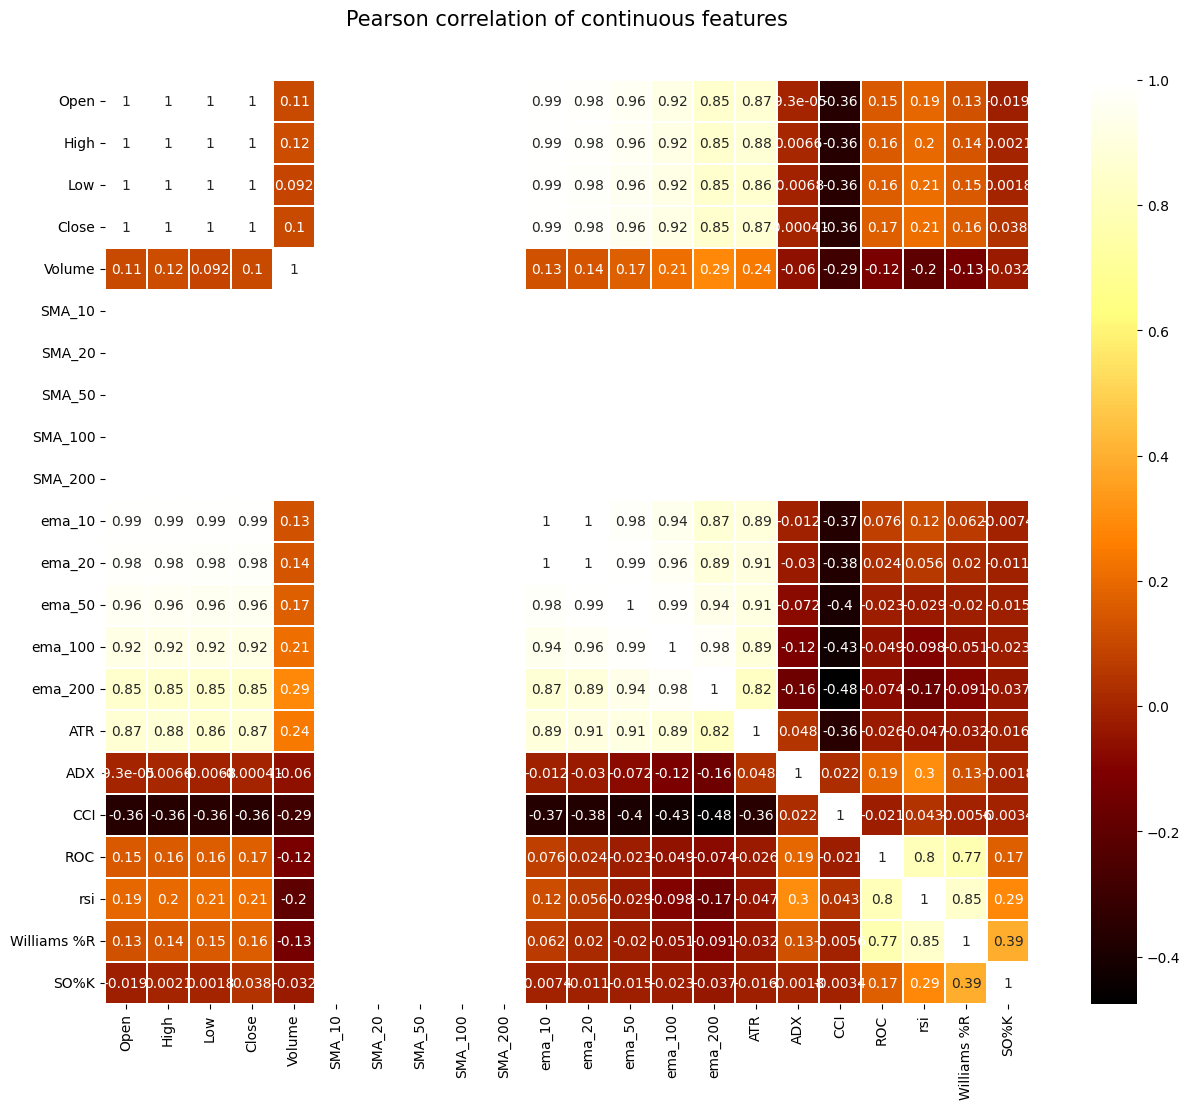

In [134]:
import seaborn as sns
colormap =plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(ti.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

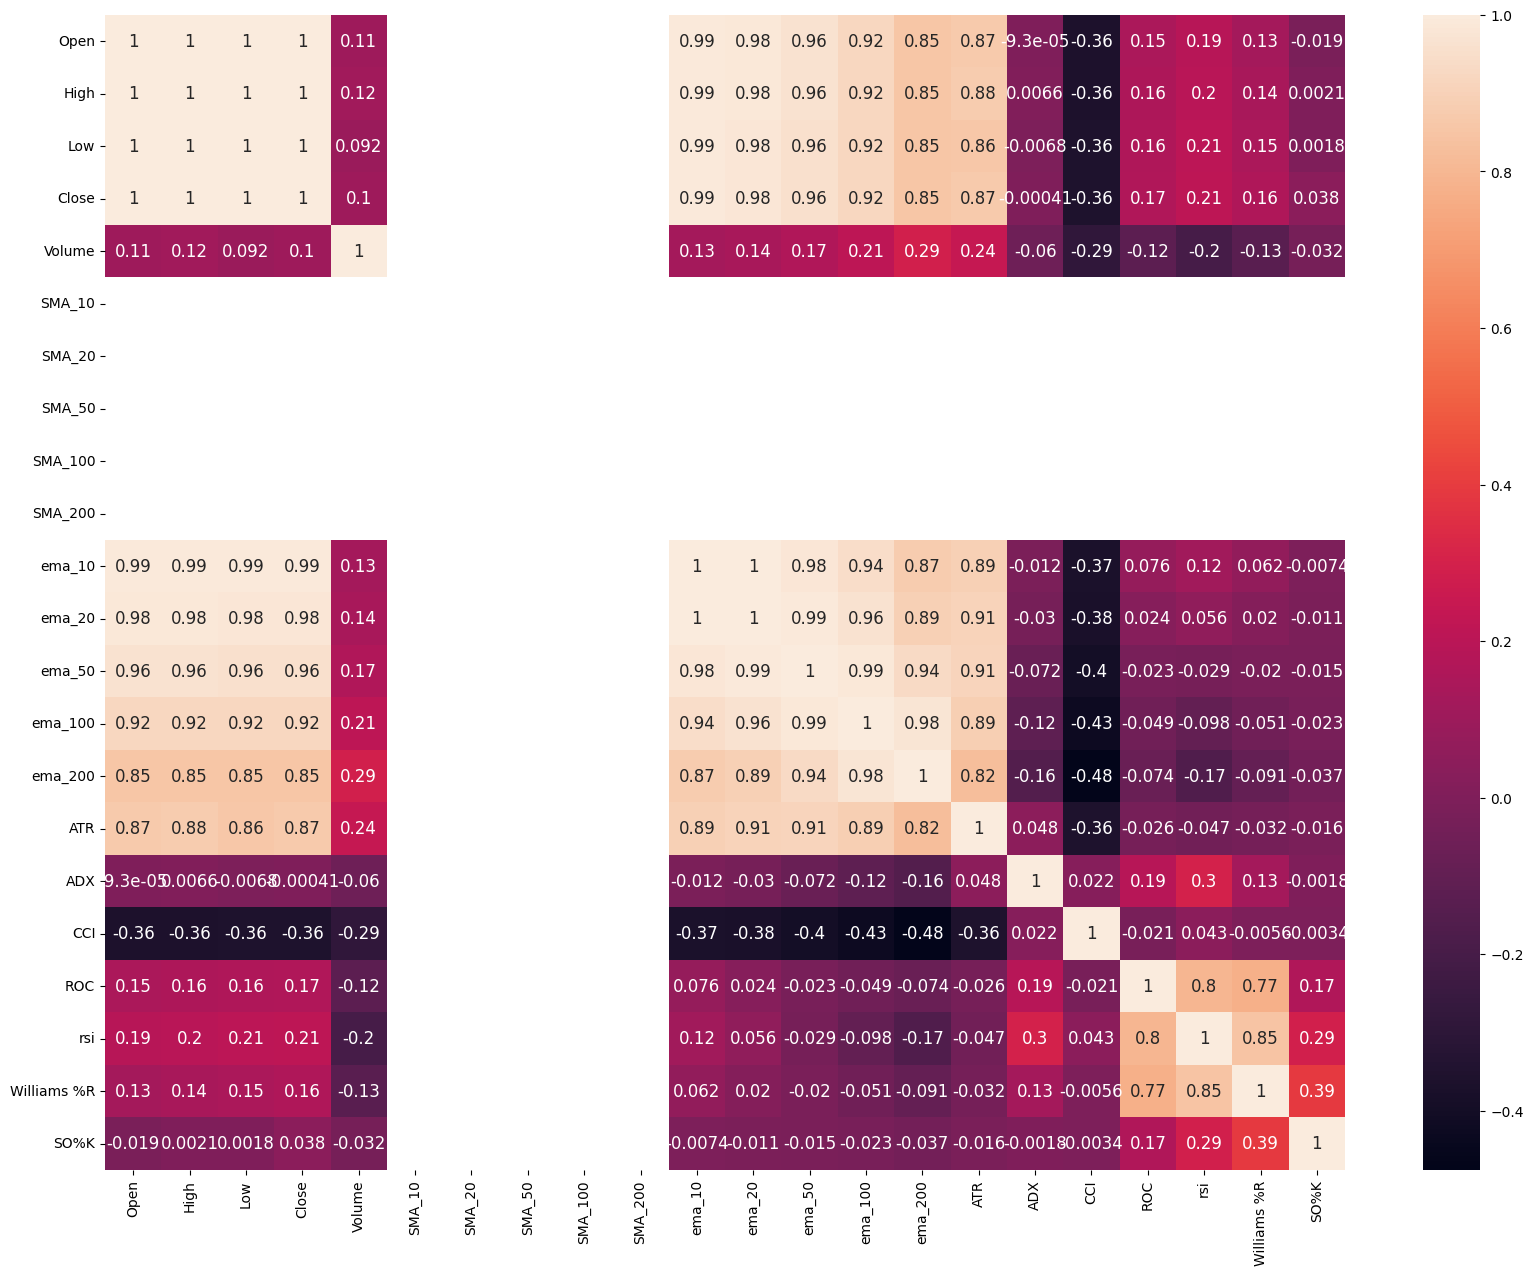

In [135]:
import seaborn as sns
corr = ti.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [136]:
ti.tail()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,ema_10,ema_20,ema_50,ema_100,ema_200,ATR,ADX,CCI,ROC,rsi,Williams %R,SO%K
date,,,,,,,,,,,,,,,,,,,,,,
2023-08-07 10:00:00,31.784886,32.896582,31.436876,32.355236,58137960.0,1035.752006,518.376003,207.950401,104.475201,52.7376,31.167441,29.344773,26.128384,22.644377,18.441107,1.907244,27.328740,1333.333333,20.855012,69.506187,-22.706334,0.629140
2023-08-14 10:00:00,32.287568,34.143618,32.171562,33.341264,68822421.0,1035.752006,518.376003,207.950401,104.475201,52.7376,31.562682,29.725391,26.411242,22.856196,18.589368,1.911873,28.296764,1333.333333,21.428773,72.200831,-14.881232,0.593138
2023-08-21 10:00:00,33.447596,35.840000,32.722576,35.040001,66054842.0,1035.752006,518.376003,207.950401,104.475201,52.7376,32.194921,30.231545,26.749625,23.097460,18.753056,1.997984,29.731353,1333.333333,26.021424,76.116525,-8.366761,0.743378
2023-08-28 10:00:00,35.020000,35.810001,34.139999,35.689999,70643100.0,1035.752006,518.376003,207.950401,104.475201,52.7376,32.830390,30.751397,27.100227,23.346817,18.921584,1.974557,31.063472,1333.333333,15.694375,77.426737,-1.597801,0.928143
2023-09-04 10:00:00,35.660000,37.460000,35.000000,36.990000,39668400.0,1035.752006,518.376003,207.950401,104.475201,52.7376,33.586683,31.345550,27.488062,23.616979,19.101370,2.009231,32.762029,1333.333333,14.598540,79.812087,-4.822191,0.808943


In [137]:
ti['pred_price'] = np.where(ti['Close'].pct_change() * 100 > 0, 0, 1)
ti['pred_price'] = ti['pred_price'].shift(-1)
ti = ti.dropna()
print(ti.tail())

                          Open       High        Low      Close      Volume       SMA_10      SMA_20      SMA_50     SMA_100  SMA_200     ema_10  \
date                                                                                                                                               
2023-07-31 10:00:00  32.384235  33.669940  31.175868  31.784886  99893278.0  1035.752006  518.376003  207.950401  104.475201  52.7376  30.903487   
2023-08-07 10:00:00  31.784886  32.896582  31.436876  32.355236  58137960.0  1035.752006  518.376003  207.950401  104.475201  52.7376  31.167441   
2023-08-14 10:00:00  32.287568  34.143618  32.171562  33.341264  68822421.0  1035.752006  518.376003  207.950401  104.475201  52.7376  31.562682   
2023-08-21 10:00:00  33.447596  35.840000  32.722576  35.040001  66054842.0  1035.752006  518.376003  207.950401  104.475201  52.7376  32.194921   
2023-08-28 10:00:00  35.020000  35.810001  34.139999  35.689999  70643100.0  1035.752006  518.376003  207.950401

In [138]:
ti['pred_price'].unique()

array([0., 1.])

- Recheck the dataframe to see if the dataset is ready for train.
- Split the ti dataframe to inputs(X) and outputs(y)

In our dataset, we have all the columns except pred_price as inputs and the pred_price column output.

We are not shuffling data before splitting as we really want to predict prices in future by training our model on past data. We have to be careful here while training and evaluating time series data as there can be a high chance of overfitting (and don’t use cross-validation for evaluation).

As this is a time series, it is important we do not randomly pick training and testing samples.


In [139]:
#ti = ti.fillna(0)

In [140]:
y = ti['pred_price']
x = ti.drop(columns = ['pred_price', 'Close',  'Volume'])

In [141]:
train_x.tail()

,Open,High,Low,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,ema_10,ema_20,ema_50,ema_100,ema_200,ATR,ADX,CCI,ROC,rsi,Williams %R,SO%K
date,,,,,,,,,,,,,,,,,,,,
2016-08-22 10:00:00,6.049815,6.159443,5.854922,1035.756006,518.378003,207.951201,104.475601,52.7378,5.516786,5.108161,4.658749,4.850411,5.739330,0.525035,25.720278,1333.333333,38.390379,69.526484,-8.073394,0.720000
2016-08-29 10:00:00,6.070117,6.366517,5.932067,1035.756006,518.378003,207.951201,104.475601,52.7378,5.667591,5.226071,4.724924,4.880030,5.745370,0.518565,26.899159,1333.333333,41.704443,72.088320,-0.872600,0.953271
2016-09-05 10:00:00,6.423361,6.679159,6.293432,1035.756006,518.378003,207.951201,104.475601,52.7378,5.781381,5.327725,4.786434,4.908019,5.750824,0.509077,28.402190,1333.333333,36.084284,70.843851,-15.447168,0.000000
2016-09-12 10:00:00,6.269070,6.537049,5.992972,1035.756006,518.378003,207.951201,104.475601,52.7378,5.830187,5.396495,4.835979,4.930628,5.753799,0.511577,28.816185,1333.333333,30.358705,65.245472,-25.203264,0.104478
2016-09-19 10:00:00,6.167563,6.398999,6.009213,1035.756006,518.378003,207.951201,104.475601,52.7378,5.875287,5.461423,4.884695,4.953353,5.757028,0.502877,29.200610,1333.333333,24.129353,65.587146,-25.429566,0.177083


In [142]:
test_x.head()

,Open,High,Low,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,ema_10,ema_20,ema_50,ema_100,ema_200,ATR,ADX,CCI,ROC,rsi,Williams %R,SO%K
date,,,,,,,,,,,,,,,,,,,,
2016-09-26 10:00:00,6.049815,6.289372,5.757475,1035.756006,518.378003,207.951201,104.475601,52.7378,5.924737,5.526741,4.934207,4.976995,5.760912,0.504950,28.763941,1333.333333,23.089431,66.449791,-22.508605,0.732824
2016-10-03 10:00:00,6.208166,6.947137,6.163503,1035.756006,518.378003,207.951201,104.475601,52.7378,6.098816,5.655830,5.010598,5.014721,5.772070,0.526016,29.396532,1333.333333,28.214833,73.940081,-2.622950,0.917098
2016-10-10 10:00:00,6.951198,7.276020,6.784725,1035.756006,518.378003,207.951201,104.475601,52.7378,6.311377,5.809360,5.099120,5.059339,5.786956,0.523536,30.395414,1333.333333,30.181818,76.860149,-0.362319,0.983471
2016-10-17 10:00:00,7.267899,7.856639,7.198874,1035.756006,518.378003,207.951201,104.475601,52.7378,6.590119,6.003179,5.206780,5.114490,5.807432,0.533124,31.926965,1333.333333,37.901499,80.396141,-0.460830,0.981481
2016-10-24 10:00:00,7.925664,8.006869,7.600841,1035.756006,518.378003,207.951201,104.475601,52.7378,6.804154,6.171192,5.307193,5.167021,5.826937,0.524046,33.486567,1333.333333,44.268469,78.664017,-8.575583,0.410000


In [143]:
train_x = x[: int( len(x) * 0.7)] 
test_x  = x[  int( len(x) * 0.7):] 
print('Observations: %d' % (len(x)))
print('Train Dataset:',train_x.shape)
print('Test Dataset:', test_x.shape)

Observations: 1208
Train Dataset: (845, 20)
Test Dataset: (363, 20)


In [144]:
train_y = y[: int( len(x) * 0.7)] 
test_y  = y[  int( len(x) * 0.7):] 
print('Observations: %d' % (len(y)))
print('Train Dataset:',train_y.shape)
print('Test Dataset:', test_y.shape)

Observations: 1208
Train Dataset: (845,)
Test Dataset: (363,)


<Figure size 1200x600 with 0 Axes>

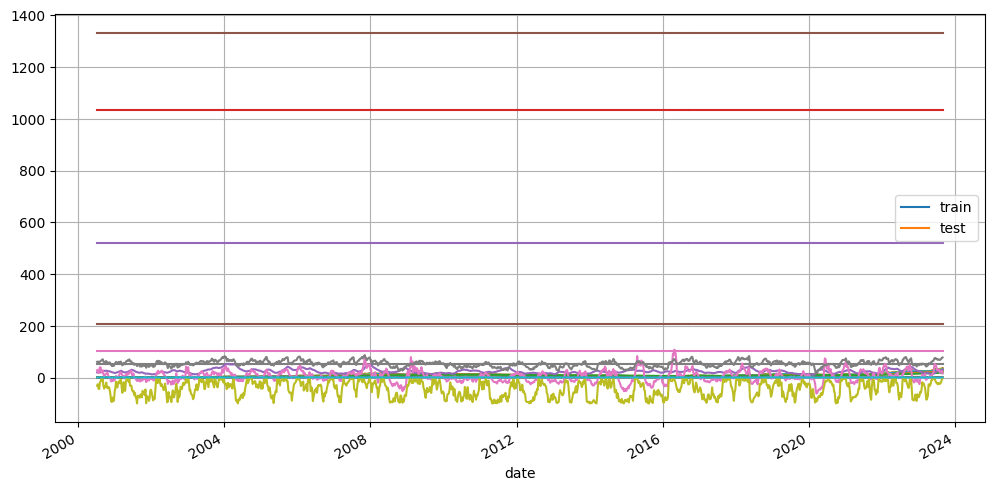

In [145]:
plt.figure(figsize=(12, 6))
ax = train_x.plot(grid=True, figsize=(12, 6))
test_x.plot(ax=ax, grid=True)
plt.legend(['train', 'test']);
plt.show()

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) # scaling down the values
train_x_scaled = scaler.fit_transform(train_x)
print(train_x_scaled)

[[0.01087661 0.00792729 0.00927965 ... 0.581459   0.68263547 0.29166677]
 [0.00962847 0.00522863 0.00872287 ... 0.60639246 0.74251532 0.77142781]
 [0.00873694 0.00455398 0.00760932 ... 0.49603956 0.56886293 0.1081069 ]
 ...
 [0.28335738 0.27965699 0.29137725 ... 0.76820487 0.991274   0.95327104]
 [0.30352027 0.29653759 0.31284674 ... 0.74767058 0.84552832 0.        ]
 [0.29471349 0.28886458 0.29499571 ... 0.65529488 0.74796736 0.10447761]]


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
import pandas_datareader as web

from sklearn.preprocessing import LabelEncoder
import matplotlib

# Time for Classification Models
import time
from sklearn import svm

dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": svm.SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": XGBClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Neural Net": MLPClassifier(solver='adam', alpha=0.0001,learning_rate='constant', learning_rate_init=0.001),
    "Naive Bayes": GaussianNB()
}

In [148]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(train_x_scaled, train_y, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), 
                              columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(train_x_scaled, train_y)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(train_x_scaled, train_y)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [149]:
df_results = batch_classify(train_x_scaled, train_y)
print(df_results.sort_values(by='train_score', ascending=True))

trained Logistic Regression in 0.08 s
trained Nearest Neighbors in 0.01 s
trained Support Vector Machine in 0.02 s
trained Gradient Boosting Classifier in 1.13 s
trained Decision Tree in 0.13 s
trained Random Forest in 0.19 s
trained Neural Net in 11.71 s
trained Naive Bayes in 0.01 s
                     classifier  train_score  training_time
7                   Naive Bayes     0.558580       0.013872
2        Support Vector Machine     0.560947       0.022018
0           Logistic Regression     0.566864       0.079269
6                    Neural Net     0.581065      11.708487
1             Nearest Neighbors     0.721893       0.009656
3  Gradient Boosting Classifier     1.000000       1.134381
4                 Decision Tree     1.000000       0.129613
5                 Random Forest     1.000000       0.192901


/media/eel/DATAUbuntu/Projetos/StockTrend/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [150]:
# Use Cross-validation.

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, train_x_scaled, train_y, cv=5)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = svm.SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, train_x_scaled, train_y, cv=5)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, train_x_scaled, train_y, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, train_x_scaled, train_y, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = XGBClassifier()
grad_scores = cross_val_score(grad_clf, train_x_scaled, train_y, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=100)
rand_scores = cross_val_score(rand_clf, train_x_scaled, train_y, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=0.0001, max_iter=5000)
neural_scores = cross_val_score(neural_clf, train_x_scaled, train_y, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, train_x_scaled, train_y, cv=5)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'XGBoost CLF', 'Rand FC', 'Neural Classifier', 'Naive Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [151]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
1,SVC,0.511243
0,Logistic Reg.,0.507692
3,Dec Tree,0.449704
6,Neural Classifier,0.449704
7,Naive Bayes,0.449704
2,KNN,0.443787
4,XGBoost CLF,0.442604
5,Rand FC,0.436686


In [152]:
# estimate accuracy on validation dataset
test_x_scaled = scaler.transform(test_x)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [154]:
SVC = svm.SVC(gamma = 'auto')
SVC.fit(train_x_scaled, train_y)
predictions = SVC.predict(test_x_scaled)
print("accuracy score:")
print(accuracy_score(test_y, predictions))
print("confusion matrix: ")
print(confusion_matrix(test_y, predictions))
print("classification report: ")
print(classification_report(test_y, predictions))

accuracy score:
0.49586776859504134
confusion matrix: 
[[ 70 138]
 [ 45 110]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.34      0.43       208
         1.0       0.44      0.71      0.55       155

    accuracy                           0.50       363
   macro avg       0.53      0.52      0.49       363
weighted avg       0.54      0.50      0.48       363



In [155]:
xgb = XGBClassifier()
xgb.fit(train_x_scaled, train_y)
predictions = xgb.predict(test_x_scaled)
print("accuracy score:")
print(accuracy_score(test_y, predictions))
print("confusion matrix: ")
print(confusion_matrix(test_y, predictions))
print("classification report: ")
print(classification_report(test_y, predictions))

accuracy score:
0.5013774104683195
confusion matrix: 
[[ 89 119]
 [ 62  93]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.59      0.43      0.50       208
         1.0       0.44      0.60      0.51       155

    accuracy                           0.50       363
   macro avg       0.51      0.51      0.50       363
weighted avg       0.53      0.50      0.50       363



roc auc is :0.5347084367245657


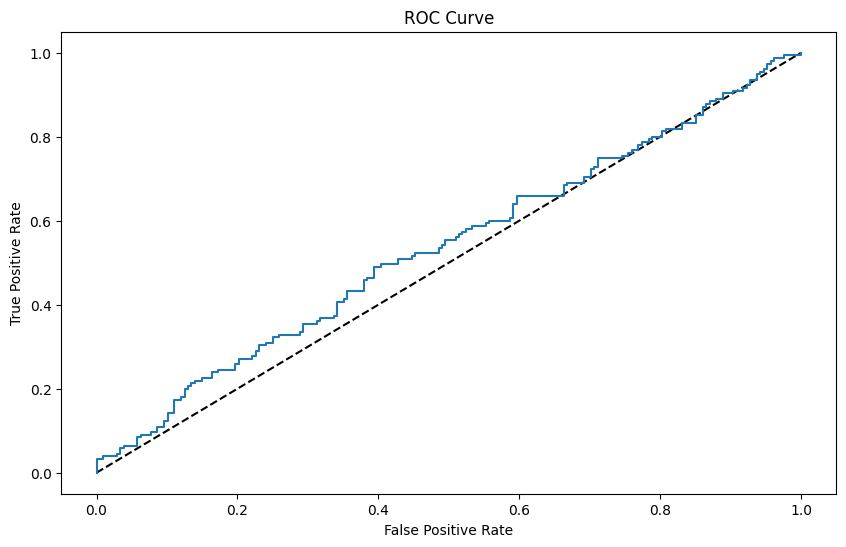

In [156]:
# Generating the ROC curve
y_pred_proba = xgb.predict_proba(test_x_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [157]:
from sklearn.model_selection import KFold
# AUC score using cross validation
kfold_val = KFold(n_splits=5)
auc_score = cross_val_score(xgb, test_x_scaled, test_y, cv=5, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

AUC using cross val: [0.49423963 0.4984639  0.44777266 0.46656176 0.53579858]
Mean AUC score is: 0.48856730733205944


In [158]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500]
max_depth = [1, 2, 3, 4, 5, 6]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(train_x_scaled, train_y)
        y_pred = model.predict(test_x_scaled)
        score = accuracy_score(test_y, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6]
Score is 0.48760330578512395 at depth of 1 and estimator 150
Score is 0.4903581267217631 at depth of 2 and estimator 150
Score is 0.5041322314049587 at depth of 3 and estimator 150
Score is 0.5041322314049587 at depth of 4 and estimator 150
Score is 0.5068870523415978 at depth of 5 and estimator 150
Score is 0.5206611570247934 at depth of 6 and estimator 150
Score is 0.4793388429752066 at depth of 1 and estimator 200
Score is 0.5068870523415978 at depth of 2 and estimator 200
Score is 0.5068870523415978 at depth of 3 and estimator 200
Score is 0.5206611570247934 at depth of 4 and estimator 200
Score is 0.509641873278237 at depth of 5 and estimator 200
Score is 0.512396694214876 at depth of 6 and estimator 200
Score is 0.4765840220385675 at depth of 1 and estimator 250
Score is 0.5289256198347108 at depth of 2 and estimator 250
Score is 0.5041322314049587 at depth of 3 and estimator 250
Score is 0.5041322314049587 at depth of 4 and estimator 250
Score is 0.51515151515

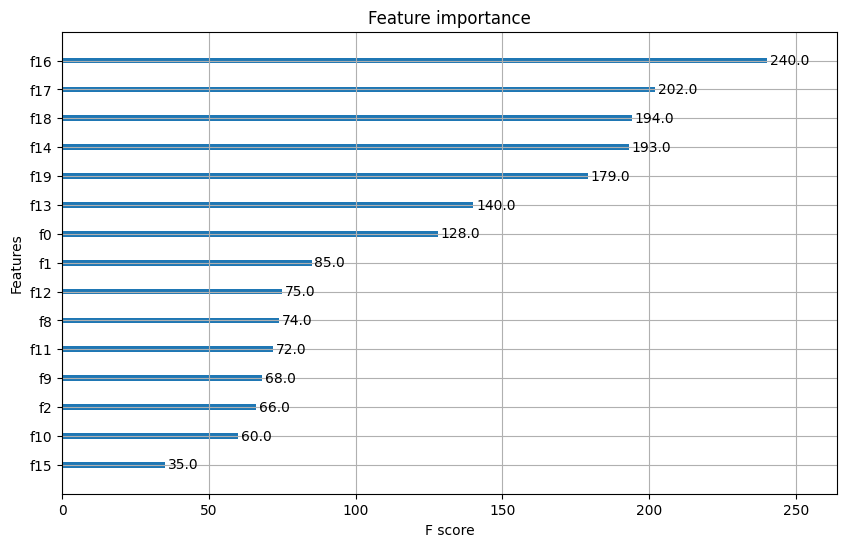

In [159]:
%matplotlib inline
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10, 6)
plot_importance(xgb)
plt.show()

In [160]:
log_reg

LogisticRegression(max_iter=5000)

In [161]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_reg.fit(train_x_scaled, train_y)
predictions = log_reg.predict(test_x_scaled)
print("accuracy score:")
print(accuracy_score(test_y, predictions))
print("confusion matrix: ")
print(confusion_matrix(test_y, predictions))
print("classification report: ")
print(classification_report(test_y, predictions))

accuracy score:
0.5068870523415978
confusion matrix: 
[[ 74 134]
 [ 45 110]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.36      0.45       208
         1.0       0.45      0.71      0.55       155

    accuracy                           0.51       363
   macro avg       0.54      0.53      0.50       363
weighted avg       0.55      0.51      0.49       363



In [162]:
# The estimated coefficients will all be around 1:
print(log_reg.coef_)

[[-0.09781233 -0.06251839  0.07324058  0.          0.          0.
   0.          0.         -0.01544363  0.07108178 -0.0624769   0.0524244
   0.62736876 -0.14199569 -0.13555356  0.13209681  0.4638399   0.56495909
  -0.65240793 -0.12425783]]


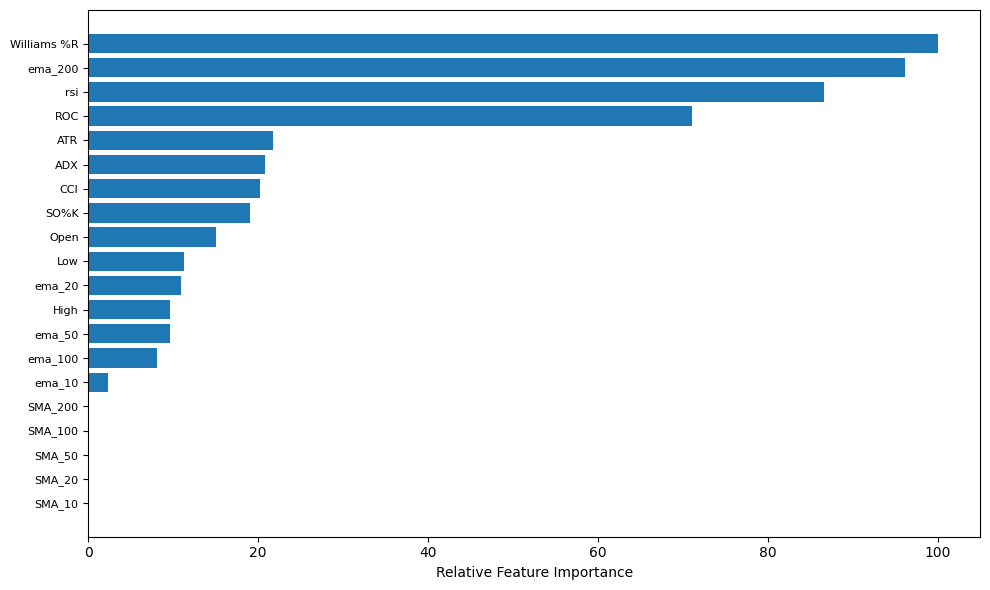

In [163]:
feature_importance = abs(log_reg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(train_x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

roc auc is :0.5422766749379653


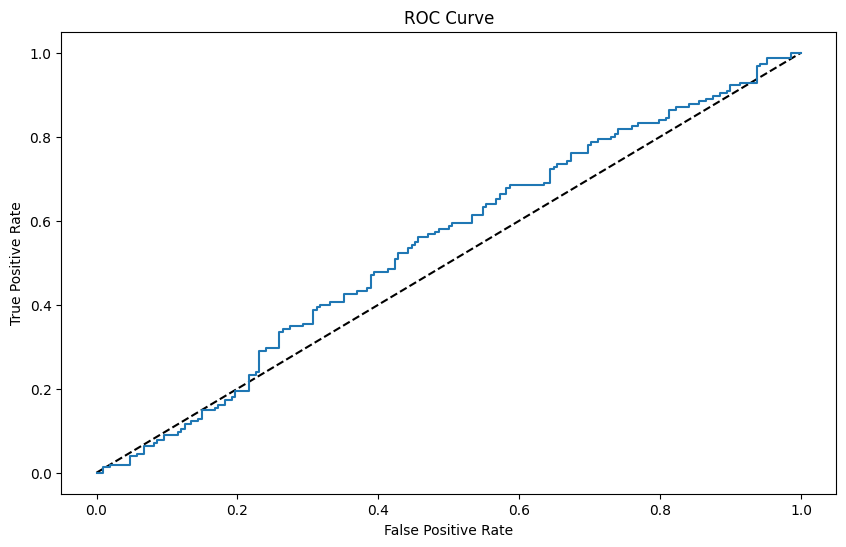

In [164]:
# Generating the ROC curve
y_pred_proba = log_reg.predict_proba(test_x_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [165]:
model = LogisticRegression(solver='lbfgs', max_iter=5000)
n_estimators = [150, 200, 250, 450, 500]
max_depth = [1, 2, 3, 4, 5, 6]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = LogisticRegression(solver='lbfgs', max_iter=5000)
        model.fit(train_x_scaled, train_y)
        y_pred = model.predict(test_x_scaled)
        score = accuracy_score(test_y, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6]
Score is 0.5068870523415978 at depth of 1 and estimator 150
Score is 0.5068870523415978 at depth of 2 and estimator 150
Score is 0.5068870523415978 at depth of 3 and estimator 150
Score is 0.5068870523415978 at depth of 4 and estimator 150
Score is 0.5068870523415978 at depth of 5 and estimator 150
Score is 0.5068870523415978 at depth of 6 and estimator 150
Score is 0.5068870523415978 at depth of 1 and estimator 200
Score is 0.5068870523415978 at depth of 2 and estimator 200
Score is 0.5068870523415978 at depth of 3 and estimator 200
Score is 0.5068870523415978 at depth of 4 and estimator 200
Score is 0.5068870523415978 at depth of 5 and estimator 200
Score is 0.5068870523415978 at depth of 6 and estimator 200
Score is 0.5068870523415978 at depth of 1 and estimator 250
Score is 0.5068870523415978 at depth of 2 and estimator 250
Score is 0.5068870523415978 at depth of 3 and estimator 250
Score is 0.5068870523415978 at depth of 4 and estimator 250
Score is 0.5068870523

In [166]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x_scaled, train_y)
predictions = rf.predict(test_x_scaled)
print("accuracy score:")
print(accuracy_score(test_y, predictions))
print("confusion matrix: ")
print(confusion_matrix(test_y, predictions))
print("classification report: ")
print(classification_report(test_y, predictions))

accuracy score:
0.5261707988980716
confusion matrix: 
[[102 106]
 [ 66  89]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.49      0.54       208
         1.0       0.46      0.57      0.51       155

    accuracy                           0.53       363
   macro avg       0.53      0.53      0.53       363
weighted avg       0.54      0.53      0.53       363



In [167]:
daily_return = ti['Close'].pct_change()
sharpe_ratio = daily_return.mean() / daily_return.std()
print(sharpe_ratio)

0.0771213931398129


In [168]:
an_sharpe_ratio = (252**0.5) * sharpe_ratio # annualised sharpe ratio
print(an_sharpe_ratio)

1.224264162064726


negative Sharpe ratio means the risk-free rate is greater than the portfolio's return, or the portfolio's return is expected to be negative.